<a href="https://colab.research.google.com/github/anyfish/IBM_HR_Analytics/blob/main/IBM_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM HR Analytics Employee Attrition & Performance

- [WebApp](https://modeloexamenmartinfarrera.herokuapp.com/)

- [GitHub](https://github.com/anyfish/IBM_HR_Analytics)

# Librerias

In [5]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/dive')

Drive already mounted at /content/dive; to attempt to forcibly remount, call drive.mount("/content/dive", force_remount=True).


In [6]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# División de DS
from sklearn.model_selection import train_test_split

# Reducción de Dimensionalidad
from sklearn.decomposition import PCA

# Balanceo de datos
from imblearn.over_sampling import SMOTE

# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

# Modelos de ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Red Neuronal
from sklearn.neural_network import MLPClassifier

# Metricas de Precisión
from sklearn.metrics import f1_score, recall_score, cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Ajustes de Hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Guardar Modelos
from joblib import dump, load

# Funciones Auxiliares

In [7]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [8]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

# Datos

### Lectura

In [9]:
df = pd.read_csv('/content/dive/MyDrive/Colab Notebooks/AI Lab/Examen/IBM HR/BD_IBM_HR-Employee.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### **Caracteristicas en Escala**

- **Education:**
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'

- **EnvironmentSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **JobInvolvement:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **JobSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

- **PerformanceRating:**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- **RelationshipSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **WorkLifeBalance:**
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

## Distribución de Etiquetas

"Attrition" es la etiqueta en nuestro conjunto de datos y representa el si el empleado esta desgastado (en burnout).



In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Procesamiento

## Checkpoint

In [11]:
df_p = df.copy()

## Información de Caracteristicas

In [12]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Revisión de NA en Caracteristicas

In [13]:
df_p.isna().any().value_counts() - len(df_p.columns)

False    0
dtype: int64

## Revisión de Valores Infinitos en Caracteristicas

In [14]:
df_p.isin([np.inf, - np.inf]).any().value_counts() - len(df_p.columns)

False    0
dtype: int64

## Revision Categorias del Tipo Objeto

In [15]:
col_obj = df_p.select_dtypes(include='object').columns
col_obj

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [16]:
for i in col_obj:
  count = df_p[i].value_counts()
  print(f"{i}:\n{count},\n")

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64,

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64,

Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64,

EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64,

Gender:
Male      882
Female    588
Name: Gender, dtype: int64,

JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64,

MaritalStatus:
Married     673
Single      470
Divorced    327
Name: 

# Transformación

### Checkpoint

In [17]:
df_t = df.copy()

### Eliminar Categorias Innecesarias

Se decide eliminar la caracteristica "Over18", "EmployeeNumber" y "EmployeeCount" ya que no aporta nada información relevante al analisis

In [18]:
df_t = df_t.drop(['Over18', 'EmployeeNumber','EmployeeCount'], axis=1)

In [19]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Codifición de Caracteristicas Categoricas

In [20]:
col = df_t.select_dtypes(include='object').columns

df_t = pd.get_dummies(df_t, columns=col, drop_first=True, prefix_sep='_')

In [21]:
df_t = df_t.rename(columns={'Attrition_Yes':'Attrition'})

In [22]:
df_t

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


In [23]:
len(df_t.select_dtypes(include='object').columns)

0

### Reducción de Dimensionalidad (PCA)



In [24]:
X_df = df_t.drop(['Attrition'], axis=1)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_df)

In [25]:
df_pca = pd.DataFrame(df_pca, columns=['c1','c2'])

In [26]:
df_reduce = pd.concat([df_pca, pd.DataFrame(df_t['Attrition'])], axis=1)
df_reduce

,c1,c2,Attrition
0,5140.212506,-720.188070,1
1,10529.933559,-1804.774783,0
2,-12088.374978,-3922.184159,1
3,8690.683175,-3951.631690,0
4,2193.417522,-3127.274475,0
...,...,...,...
1465,-2182.111503,-3845.964758,0
1466,7280.699915,3193.299607,0
1467,-9145.030680,11.971981,0
1468,-1115.052988,-1068.100394,0


#### Resultado

Después de la Redución de Dimensionalidad se preservó la varianza para cada caracteristics del DS en un 100%.

In [27]:
pca.explained_variance_ratio_

array([0.69475039, 0.30301245])

# Analisis

## Checkpoint

In [28]:
df_a = df_t.copy()

## Representación de Clases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


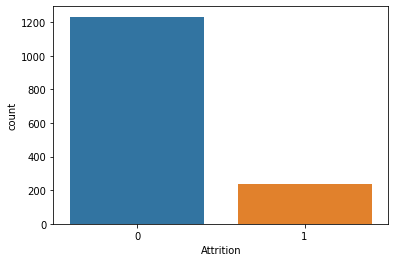

In [155]:
sns.countplot(df_a['Attrition'])

## Matriz de Correlación

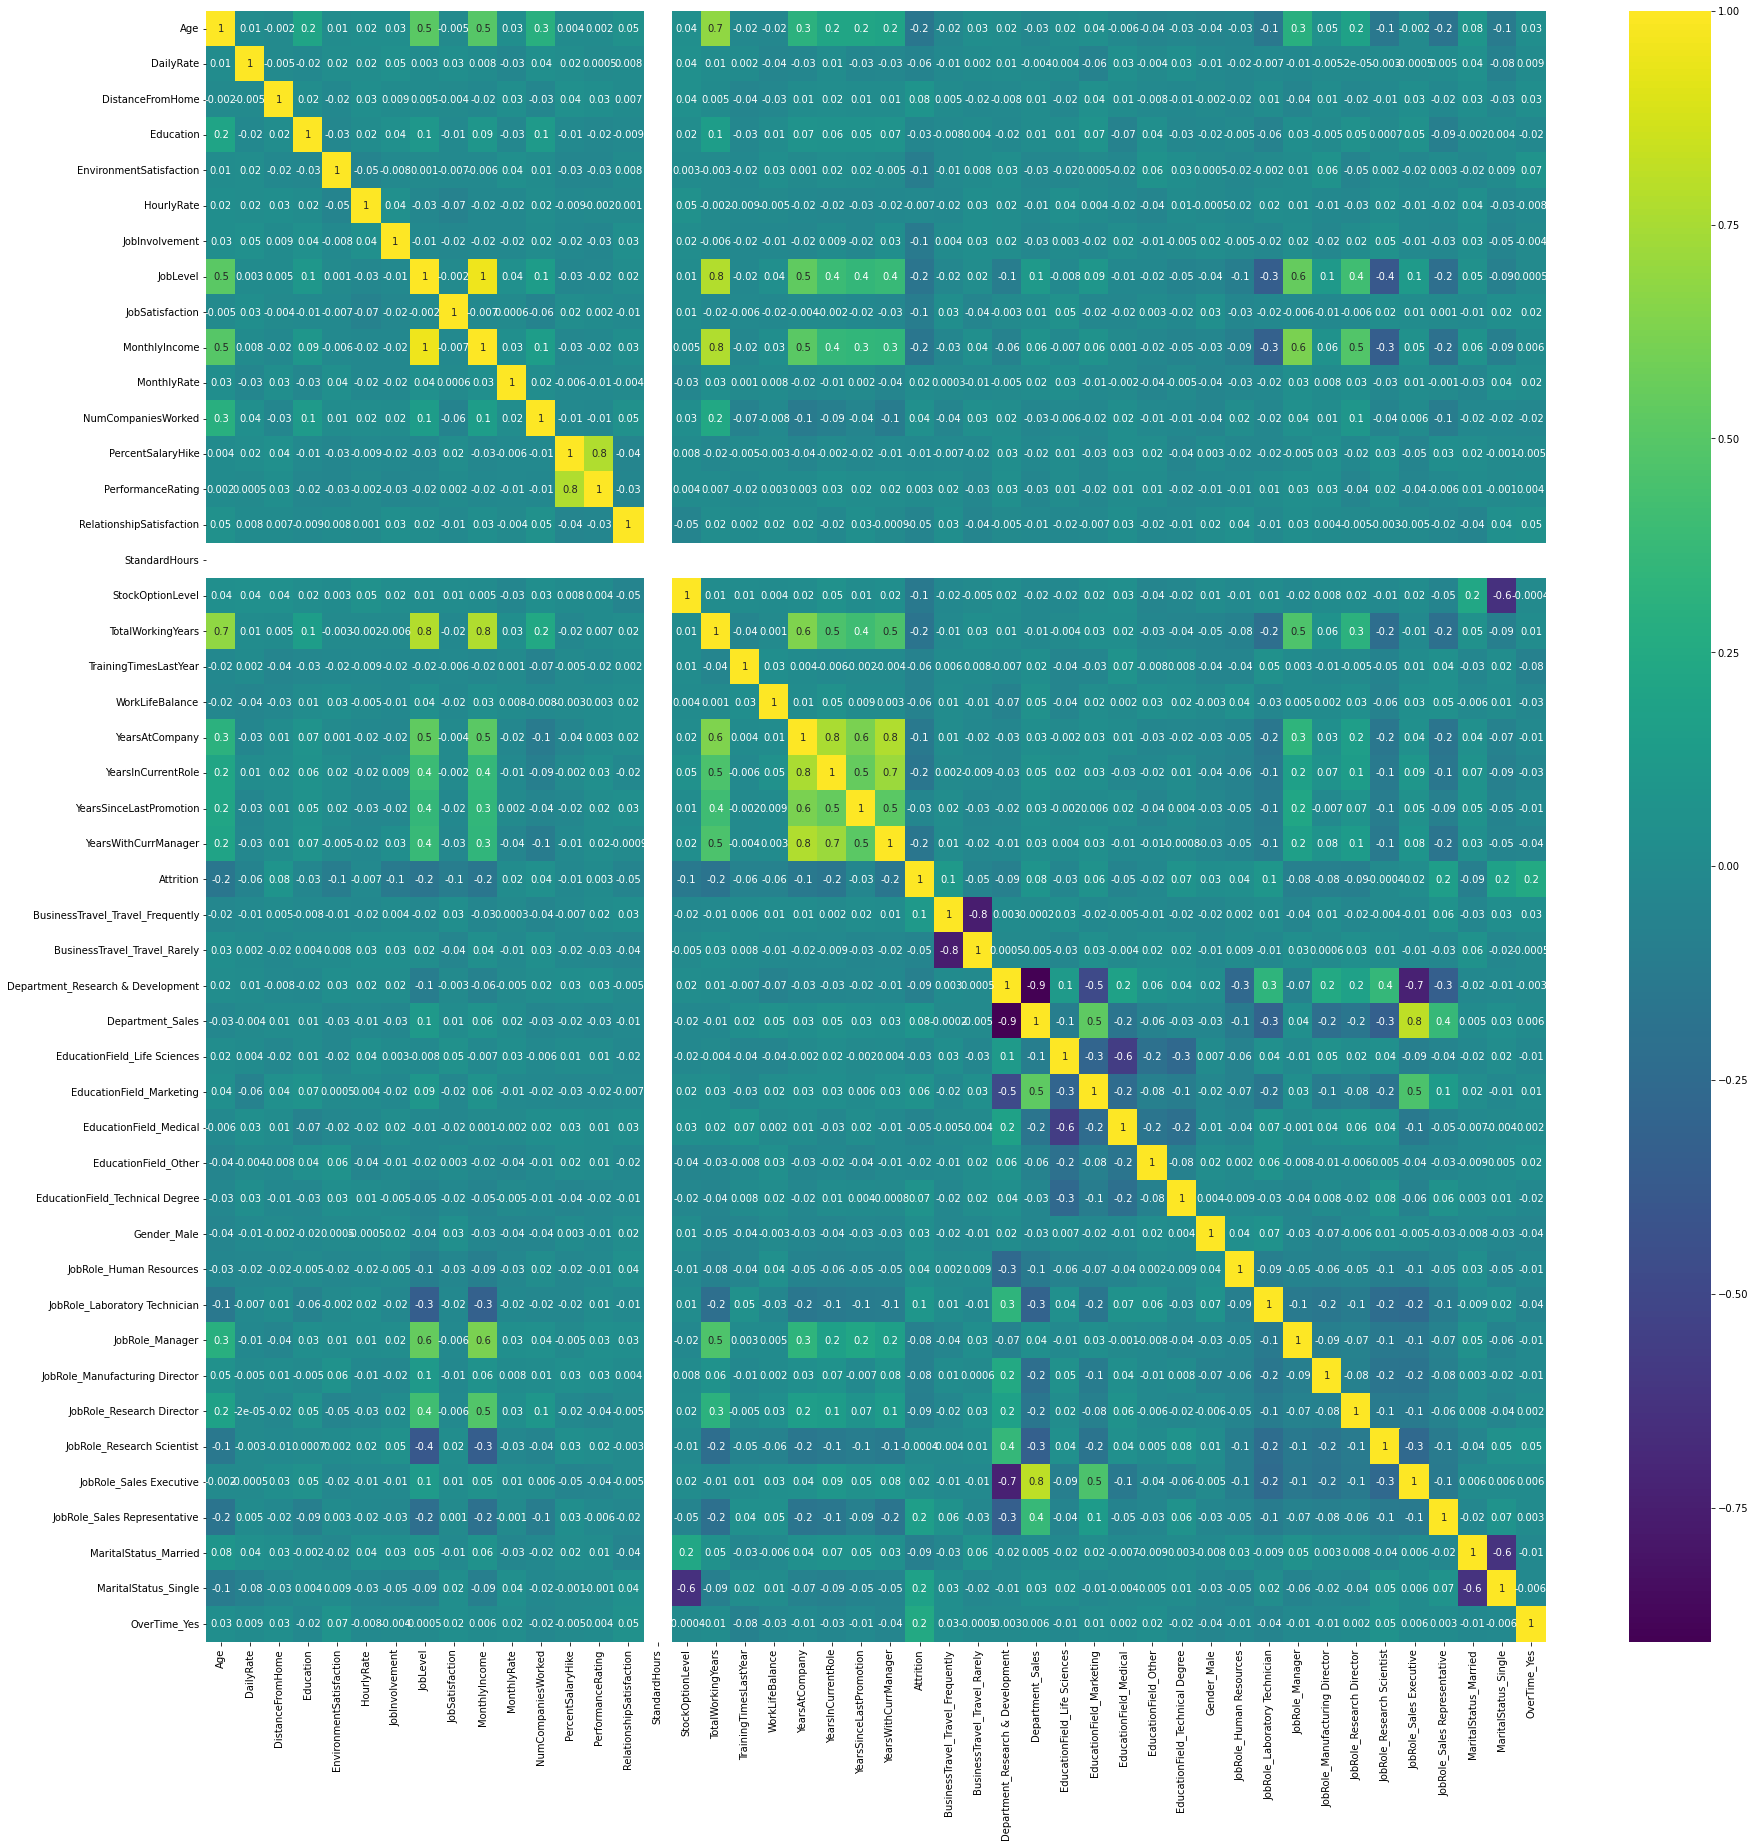

In [29]:
plt.subplots(figsize=(30,30))
sns.heatmap(df_a.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=True)

## Representación Grafica de Caracteristicas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

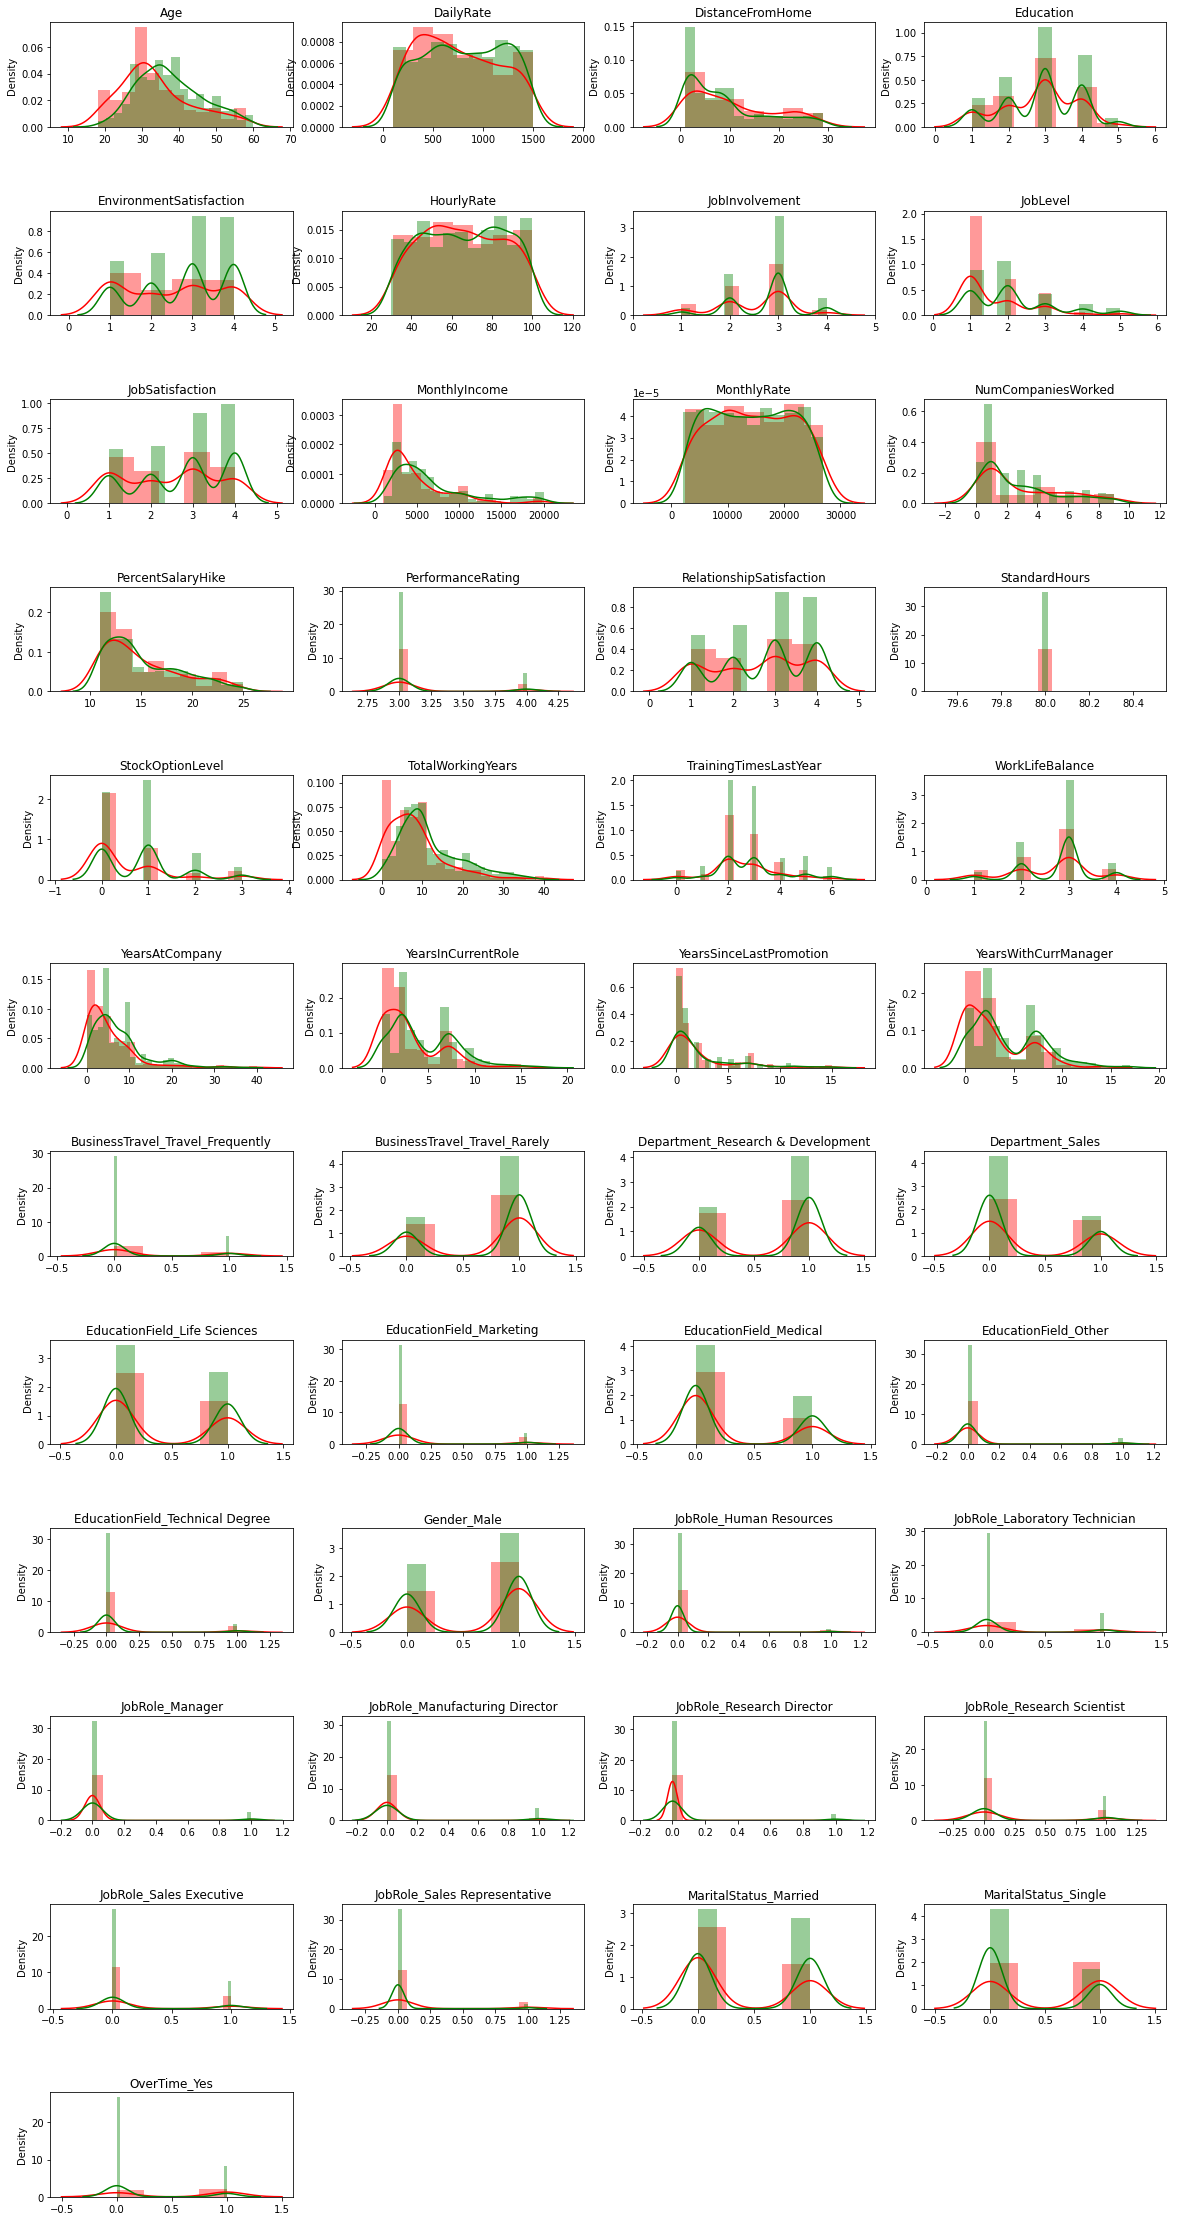

In [30]:
caracteristicas = df_a.drop('Attrition', axis=1)

plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(12,4)
gs.update(hspace=0.8)

for i, f in enumerate(caracteristicas):
    ax = plt.subplot(gs[i])
    sns.distplot(df_a[f][df_a["Attrition"] == 1], color='r')
    sns.distplot(df_a[f][df_a["Attrition"] == 0], color='g')
    ax.set_xlabel('')
    ax.set_title(str(f))

plt.show()

## Representación Grafica de Distribución de Datos

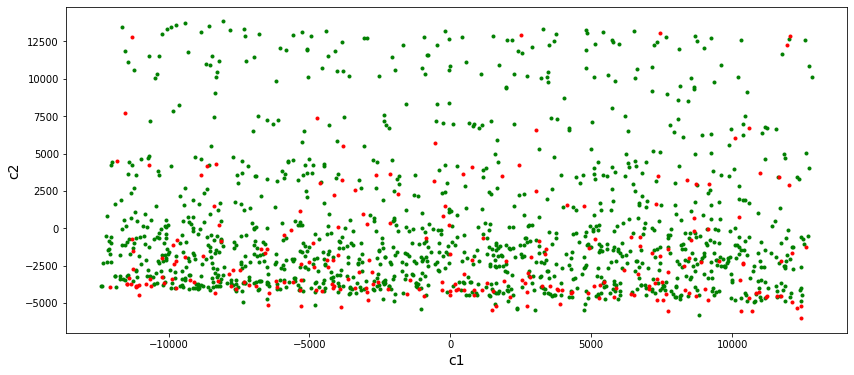

In [31]:
plt.figure(figsize=(14, 6))
plt.scatter(df_reduce["c1"][df_reduce['Attrition'] == 0], df_reduce["c2"][df_reduce['Attrition'] == 0], c="g", marker=".")
plt.scatter(df_reduce["c1"][df_reduce['Attrition'] == 1], df_reduce["c2"][df_reduce['Attrition'] == 1],c="r", marker=".")
plt.xlabel("c1", fontsize=14)
plt.ylabel("c2", fontsize=14)
plt.show()

# Preparación de DS

## Checkpoint

In [32]:
df_pr = df_t.copy()

## División del DS

In [33]:
train_set, val_set, test_set = train_val_test_split(df_pr)

In [34]:
print(f"Longitud del Training Set: {len(train_set)}")
print(f"Longitud del Validation Set: {len(val_set)}")
print(f"Longitud del test Set: {len(test_set)}")

Longitud del Training Set: 882
Longitud del Validation Set: 294
Longitud del test Set: 294


## Separación de Clases

In [35]:
X_train_sb, y_train_sb = remove_labels(train_set, 'Attrition')
X_val_sb, y_val_sb = remove_labels(val_set, 'Attrition')
X_test_sb, y_test_sb = remove_labels(test_set, 'Attrition')

## Balanceo de Datos

In [36]:
smote = SMOTE()

In [37]:
X_train, y_train = smote.fit_resample(X_train_sb, y_train_sb)
X_val, y_val = smote.fit_resample(X_val_sb, y_val_sb)
X_test, y_test = smote.fit_resample(X_test_sb, y_test_sb)

In [187]:
print(f"""
{y_train.value_counts()}

{y_val.value_counts()}

{y_test.value_counts()}""")


0    726
1    726
Name: Attrition, dtype: int64

0    256
1    256
Name: Attrition, dtype: int64

0    251
1    251
Name: Attrition, dtype: int64


## Escalamiento de Datos

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [77]:
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# Red Neuronal

## Modelo de Red Neuronal

In [131]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=500, solver='lbfgs', random_state=42)

In [132]:
mlp.fit(X_train_s, y_train)

MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=500, random_state=42,
              solver='lbfgs')

## Puntaje

### Precisión con Validation set

In [133]:
val_pred_mlp = mlp.predict(X_val)
print(classification_report(val_pred_mlp, y_val))

              precision    recall  f1-score   support

           0       0.99      0.50      0.66       509
           1       0.00      0.00      0.00         3

    accuracy                           0.49       512
   macro avg       0.49      0.25      0.33       512
weighted avg       0.98      0.49      0.66       512



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### Precisión con Test Set

In [134]:
test_pred_mlp = mlp.predict(X_test)
print(classification_report(test_pred_mlp, y_test))

              precision    recall  f1-score   support

           0       0.98      0.49      0.66       497
           1       0.00      0.00      0.00         5

    accuracy                           0.49       502
   macro avg       0.49      0.25      0.33       502
weighted avg       0.97      0.49      0.65       502



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Búsqueda de Modelo ML
Se decide usar modelos de ML por la cantidad de ejemplares con los que se cuenta.

In [49]:
n_modelos = [
    "RMV SVM",
    "Poly SVM",
    "Random Forest 8",
    "KNN 15",
    "Bernoulli",
    "Gaussian",
]

modelos = [
    SVC(kernel="rbf"),
    SVC(kernel="poly"),
    RandomForestClassifier(max_depth=85, n_estimators=493),
    KNeighborsClassifier(15),
    BernoulliNB(),
    GaussianNB()
]

In [50]:
for indice, clf in enumerate(modelos):
  # ======= TRAIN =======
  clf.fit(X_train, y_train.values.ravel())
  print(n_modelos[indice])
  # ==== VALIDATION ====
  y_val_pred = clf.predict(X_val)
  f1_val = f1_score(y_val, y_val_pred, pos_label=0)
  # ======= TEST =======
  y_test_pred = clf.predict(X_test)
  f1_test = f1_score(y_test, y_test_pred, pos_label=0)
  # ====== PUNTAJE ======
  print("F1 Validation Set: ", f1_val)
  print("F1 Test Set: ", f1_test)
  print("FIT:", f1_val - f1_test)
  print("\n==========\n")

RMV SVM
F1 Validation Set:  0.5066079295154184
F1 Test Set:  0.5746606334841629
FIT: -0.06805270396874441


Poly SVM
F1 Validation Set:  0.26426426426426425
F1 Test Set:  0.3653250773993808
FIT: -0.10106081313511656


Random Forest 8
F1 Validation Set:  0.8731884057971014
F1 Test Set:  0.8716094032549729
FIT: 0.0015790025421285048


KNN 15
F1 Validation Set:  0.558303886925795
F1 Test Set:  0.5953307392996108
FIT: -0.037026852373815755


Bernoulli
F1 Validation Set:  0.7788649706457926
F1 Test Set:  0.7648183556405354
FIT: 0.014046615005257279


Gaussian
F1 Validation Set:  0.7343412526997839
F1 Test Set:  0.7387387387387386
FIT: -0.004397486038954734




## Resultado
Se toma la decisión de un modelo Random Forest por tener la menor discrepancia entre su resultado F1 score con las predicciones de val_set (0.87) y test_set (0.87). 

# Modelo

## Entrenamiento y Ajuste de Hiperparametros

In [103]:
param_rmd = {
        'max_depth': randint(low=10, high=170),
        'n_estimators': randint(low=300, high=600)
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_rmd,
                                n_iter=50, random_state=42, scoring='f1')

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c6a41b150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c6b27fa10>},
                   random_state=42, scoring='f1')

In [105]:
clf_rnd = rnd_search.best_estimator_

## Parametros del Modelo

In [106]:
rnd_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 27,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 388,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Puntuación

### Precisión con Validation Set

In [107]:
y_val_pred = clf_rnd.predict(X_val)
print("F1 score Validation Set:", f1_score(y_val_pred, y_val, pos_label=0))

F1 score Validation Set: 0.8824593128390598


### Precisión con Test Set

In [108]:
y_test_pred = clf_rnd.predict(X_test)
print("F1 score Test Set: ", f1_score(y_test_pred, y_test, pos_label=0))

F1 score Test Set:  0.8733944954128441


## Exportar

In [136]:
dump(clf_rnd, 'model_score88.joblib')

['model_score88.joblib']

# Modelo Final
Para poner el modelo en producción se usaran las caracteristicas más importantes.

## Caracteristicas Relevantes

In [138]:
f_import = clf_rnd.feature_importances_
f_import

array([0.04079267, 0.03580099, 0.03721229, 0.01855193, 0.03510065,
       0.03748361, 0.03421604, 0.02273989, 0.04503813, 0.05488643,
       0.03857   , 0.02111803, 0.02209435, 0.00679941, 0.03341984,
       0.        , 0.06065198, 0.04017696, 0.01989661, 0.02272206,
       0.0328656 , 0.04090077, 0.0173063 , 0.03389168, 0.00467606,
       0.01283608, 0.05042152, 0.01476937, 0.01854889, 0.00527945,
       0.02418936, 0.00447688, 0.00411953, 0.00841993, 0.00311203,
       0.00594783, 0.00302041, 0.00507689, 0.00165373, 0.00945521,
       0.00618109, 0.0027321 , 0.04294075, 0.00762754, 0.01227914])

In [214]:
ls_f_import = {name: score for name, score in zip(list(X_df), f_import)}
ls_f_import_sort = pd.Series(ls_f_import).sort_values(ascending=False)
ls_f_import_sort.head(5)

StockOptionLevel                     0.060652
MonthlyIncome                        0.054886
Department_Research & Development    0.050422
JobSatisfaction                      0.045038
MaritalStatus_Married                0.042941
dtype: float64

## DS con Caracteristicas Relevantes

In [243]:
columns = list(ls_f_import_sort.head(25).index)

In [244]:
X_train_reduce = X_train[columns].copy()
X_val_reduce = X_val[columns].copy()
X_test_reduce = X_test[columns].copy()

In [262]:
X_train_reduce.describe(include='all')

,StockOptionLevel,MonthlyIncome,Department_Research & Development,JobSatisfaction,MaritalStatus_Married,YearsInCurrentRole,Age,TotalWorkingYears,MonthlyRate,HourlyRate,...,RelationshipSatisfaction,YearsAtCompany,EducationField_Medical,JobLevel,WorkLifeBalance,PercentSalaryHike,NumCompaniesWorked,TrainingTimesLastYear,Education,EducationField_Life Sciences
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,0.614325,5574.169421,0.520661,2.457300,0.328512,3.376033,35.265152,9.513774,14231.818182,67.479339,...,2.485537,5.807851,0.217631,1.798209,2.615702,15.060606,2.588154,2.606061,2.751377,0.304408
std,0.820995,4316.878071,0.499745,1.067131,0.469834,3.341847,9.153448,7.385922,6986.414044,18.613120,...,1.033784,5.617941,0.412777,1.028161,0.704207,3.453009,2.365284,1.206651,0.997325,0.460315
min,0.000000,1091.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,2094.000000,30.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2515.000000,0.000000,2.000000,0.000000,1.000000,29.000000,4.000000,8299.000000,53.000000,...,2.000000,2.000000,0.000000,1.000000,2.000000,12.000000,1.000000,2.000000,2.000000,0.000000
50%,0.000000,4068.500000,1.000000,3.000000,0.000000,2.000000,34.000000,8.000000,14309.500000,68.000000,...,3.000000,4.000000,0.000000,1.000000,3.000000,14.000000,2.000000,2.000000,3.000000,0.000000
75%,1.000000,6805.750000,1.000000,3.000000,1.000000,6.000000,41.000000,12.000000,20319.750000,83.000000,...,3.000000,8.000000,0.000000,2.000000,3.000000,17.000000,4.000000,3.000000,3.000000,1.000000
max,3.000000,19999.000000,1.000000,4.000000,1.000000,18.000000,60.000000,40.000000,26997.000000,100.000000,...,4.000000,37.000000,1.000000,5.000000,4.000000,25.000000,9.000000,6.000000,5.000000,1.000000


In [274]:
for c, i in enumerate(X_train_reduce.columns):
  print(c, ".-", i)
  print(X_train_reduce[i].min())
  print(X_train_reduce[i].mean().round(0))
  print(X_train_reduce[i].max())
  print()

0 .- StockOptionLevel
0
1.0
3

1 .- MonthlyIncome
1091
5574.0
19999

2 .- Department_Research & Development
0
1.0
1

3 .- JobSatisfaction
1
2.0
4

4 .- MaritalStatus_Married
0
0.0
1

5 .- YearsInCurrentRole
0
3.0
18

6 .- Age
18
35.0
60

7 .- TotalWorkingYears
0
10.0
40

8 .- MonthlyRate
2094
14232.0
26997

9 .- HourlyRate
30
67.0
100

10 .- DistanceFromHome
1
10.0
29

11 .- DailyRate
103
792.0
1496

12 .- EnvironmentSatisfaction
1
2.0
4

13 .- JobInvolvement
1
3.0
4

14 .- YearsWithCurrManager
0
3.0
17

15 .- RelationshipSatisfaction
1
2.0
4

16 .- YearsAtCompany
0
6.0
37

17 .- EducationField_Medical
0
0.0
1

18 .- JobLevel
1
2.0
5

19 .- WorkLifeBalance
1
3.0
4

20 .- PercentSalaryHike
11
15.0
25

21 .- NumCompaniesWorked
0
3.0
9

22 .- TrainingTimesLastYear
0
3.0
6

23 .- Education
1
3.0
5

24 .- EducationField_Life Sciences
0
0.0
1



## Entrenamiento y Ajuste de Hiperparametros

In [275]:
param_rmd = {
        'max_depth': randint(low=10, high=200),
        'n_estimators': randint(low=100, high=600)
    }

rnd_clf_final = RandomForestClassifier(n_jobs=-1)

rnd_search_final = RandomizedSearchCV(rnd_clf_final, param_distributions=param_rmd,
                                n_iter=200, scoring='f1')

rnd_search_final.fit(X_train_reduce, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_iter=200,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c66dcaf90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c66dca590>},
                   scoring='f1')

In [276]:
model = rnd_search_final.best_estimator_

### Parametros de Modelo

In [277]:
rnd_search_final.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 58,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 507,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Puntuación

### Precisión con Validation Set

In [278]:
y_val_pred_model = model.predict(X_val_reduce)
print("F1 score Validation Set:", f1_score(y_val_pred_model, y_val, pos_label=0))

F1 score Validation Set: 0.8402777777777777


### Precisión con Test Set

In [279]:
y_test_pred_model = model.predict(X_test_reduce)
print("F1 score Validation Set:", f1_score(y_test_pred_model, y_test, pos_label=0))

F1 score Validation Set: 0.8270944741532976


# Exportaciones

## Exportar Modelo

In [293]:
dump(model, "model_hr.joblib")

['model_hr.joblib']

### Test del Modelo

In [294]:
modelo = load('model_hr.joblib')

In [295]:
y_modelo_pred = modelo.predict(X_test_reduce)
print('F1 score: ', f1_score(y_modelo_pred, y_test, pos_label=0))

F1 score:  0.8270944741532976


## Exportar DS

In [296]:
# Caracteristicas
X_train_reduce.to_csv('X_train.csv', index=False)
X_val_reduce.to_csv('X_val.csv', index=False)
X_test_reduce.to_csv('X_test.csv', index=False)
# Etiquetas
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)